In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [134]:
raw_data = pd.read_csv('Transformed_Housing_Data')
raw_data

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,263000018,360000.0,3,2.50,1530.0,1131.0,3.0,No,0,Fair,...,1530.0,0,9,98103.0,47.6993,-122.346,1530.0,1509,No,0
21605,6600060120,400000.0,4,2.50,2310.0,5813.0,2.0,No,0,Fair,...,2310.0,0,4,98146.0,47.5107,-122.362,1830.0,7200,No,0
21606,1523300141,402101.0,2,0.75,1020.0,1350.0,2.0,No,0,Fair,...,1020.0,0,9,98144.0,47.5944,-122.299,1020.0,2007,No,0
21607,291310100,400000.0,3,2.50,1600.0,2388.0,2.0,No,0,Fair,...,1600.0,0,14,98027.0,47.5345,-122.069,1410.0,1287,No,0


In [135]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Sale Price                                 21609 non-null  float64
 2   No of Bedrooms                             21609 non-null  int64  
 3   No of Bathrooms                            21609 non-null  float64
 4   Flat Area (in Sqft)                        21609 non-null  float64
 5   Lot Area (in Sqft)                         21609 non-null  float64
 6   No of Floors                               21609 non-null  float64
 7   Waterfront View                            21609 non-null  object 
 8   No of Times Visited                        21609 non-null  int64  
 9   Condition of the House                     21609 non-null  object 
 10  Overall Grade         

In [136]:
raw_data.drop(columns = 'ID',inplace = True)

In [137]:
raw_data['Condition of the House'].value_counts()

Condition of the House
Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: count, dtype: int64

<Axes: xlabel='Condition of the House'>

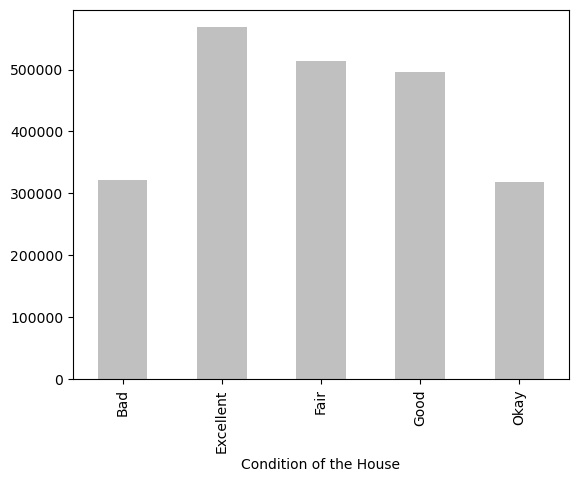

In [138]:
raw_data.groupby('Condition of the House',)['Sale Price'].mean().plot(kind = 'bar',color = 'silver')

<Axes: xlabel='Condition of the House'>

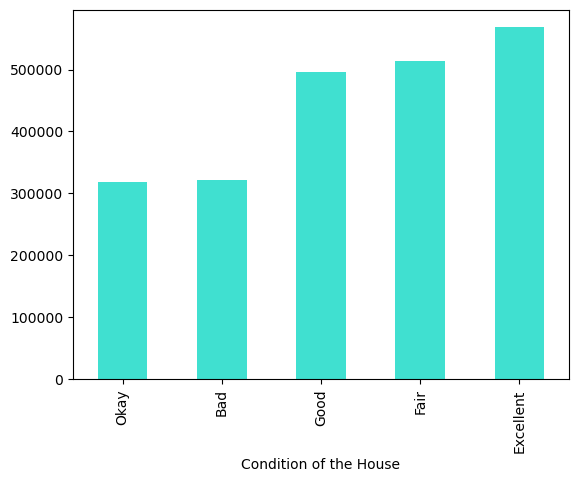

In [139]:
raw_data.groupby('Condition of the House',)['Sale Price'].mean().sort_values().plot(kind = 'bar',color = 'turquoise')

<Axes: xlabel='Waterfront View'>

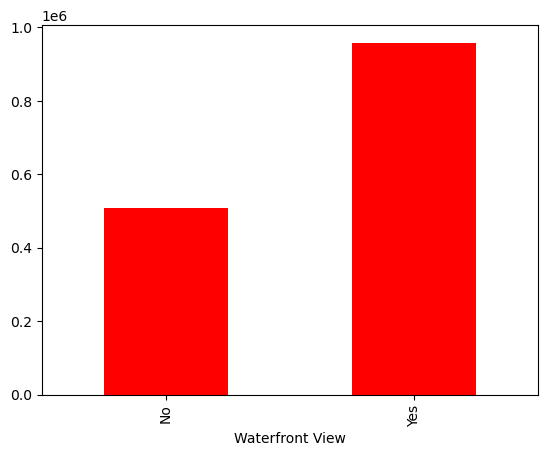

In [140]:
raw_data.groupby('Waterfront View',)['Sale Price'].mean().sort_values().plot(kind = 'bar',color = 'red')

<Axes: xlabel='Ever Renovated'>

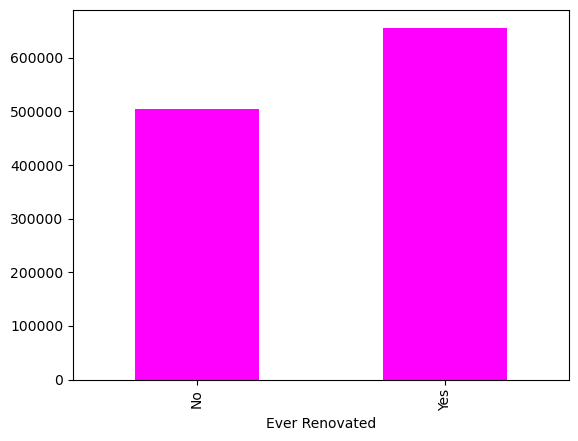

In [141]:
raw_data.groupby('Ever Renovated',)['Sale Price'].mean().sort_values().plot(kind = 'bar',color = 'magenta')

<Axes: xlabel='Zipcode'>

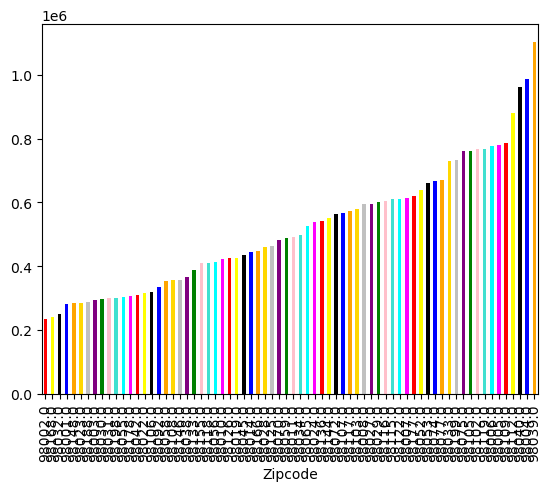

In [142]:
c = ['red', 'yellow', 'black', 'blue', 'orange','gold','silver','purple','green','pink','turquoise','aqua','magenta']
raw_data.groupby('Zipcode',)['Sale Price'].mean().sort_values().plot(kind = 'bar',color = c)

In [143]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [144]:
raw_data  = raw_data.rename(columns = {'Sale Price' : 'Sale_Price'})
raw_data  = raw_data.rename(columns = {'Condition of the House' : 'Condition_of_the_House'})
raw_data  = raw_data.rename(columns = {'Ever Renovated' : 'Ever_Renovated'})
raw_data  = raw_data.rename(columns = {'Waterfront View' : 'Waterfront_View'})

In [145]:
mod = ols('Sale_Price ~ Condition_of_the_House', data  = raw_data).fit()

In [146]:
Anova_Table1 = sm.stats.anova_lm( mod, typ = 2)

In [147]:
Anova_Table1

,sum_sq,df,F,PR(>F)
Condition_of_the_House,1.441831e+13,4.0,58.25563,5.447605e-49
Residual,1.336752e+15,21604.0,NaN,NaN


In [148]:
mod = ols('Sale_Price ~ Waterfront_View', data  = raw_data).fit()
Anova_Table2 = sm.stats.anova_lm( mod, typ = 2)
Anova_Table2

,sum_sq,df,F,PR(>F)
Waterfront_View,3.283737e+13,1.0,538.192683,1.275558e-117
Residual,1.318333e+15,21607.0,NaN,NaN


In [149]:
mod = ols('Sale_Price ~ Ever_Renovated', data  = raw_data).fit()
Anova_Table3 = sm.stats.anova_lm( mod, typ = 2)
Anova_Table3

,sum_sq,df,F,PR(>F)
Ever_Renovated,1.998463e+13,1.0,324.378469,5.419055e-72
Residual,1.331185e+15,21607.0,NaN,NaN


In [150]:
mod = ols('Sale_Price ~ Zipcode', data  = raw_data).fit()
Anova_Table2 = sm.stats.anova_lm( mod, typ = 2)
Anova_Table2

,sum_sq,df,F,PR(>F)
Zipcode,2.503765e+12,1.0,40.112844,2.444308e-10
Residual,1.348666e+15,21607.0,NaN,NaN


In [151]:
raw_data = pd.get_dummies(raw_data, columns = ['Condition_of_the_House','Ever_Renovated','Waterfront_View'],drop_first = True)

In [152]:
raw_data

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,-122.257,1340.0,5650,0,False,True,False,False,False,False
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,-122.319,1690.0,7639,26,False,True,False,False,True,False
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,-122.233,2720.0,8062,0,False,True,False,False,False,False
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,-122.393,1360.0,5000,0,True,False,False,False,False,False
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,-122.045,1800.0,7503,0,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,360000.0,3,2.50,1530.0,1131.0,3.0,0,8,1530.0,0,...,-122.346,1530.0,1509,0,False,True,False,False,False,False
21605,400000.0,4,2.50,2310.0,5813.0,2.0,0,8,2310.0,0,...,-122.362,1830.0,7200,0,False,True,False,False,False,False
21606,402101.0,2,0.75,1020.0,1350.0,2.0,0,7,1020.0,0,...,-122.299,1020.0,2007,0,False,True,False,False,False,False
21607,400000.0,3,2.50,1600.0,2388.0,2.0,0,8,1600.0,0,...,-122.069,1410.0,1287,0,False,True,False,False,False,False


In [153]:
Zip_Table = raw_data.groupby('Zipcode').agg({'Sale_Price':'mean'}).sort_values('Sale_Price',ascending = True)
Zip_Table.head()

,Sale_Price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [154]:
Zip_Table['Zipcode_Group'] = pd.cut(Zip_Table['Sale_Price'],bins = 10, labels = ['Zipcode_Group_0',
                                                                                 'Zipcode_Group_1',
                                                                                'Zipcode_Group_2',
                                                                                'Zipcode_Group_3',
                                                                                'Zipcode_Group_4',
                                                                                'Zipcode_Group_5',
                                                                                'Zipcode_Group_6',
                                                                                'Zipcode_Group_7',
                                                                                'Zipcode_Group_8',
                                                                                'Zipcode_Group_9'],include_lowest = True)
Zip_Table = Zip_Table.drop(columns = 'Sale_Price')
Zip_Table

,Zipcode_Group
Zipcode,
98002.0,Zipcode_Group_0
98168.0,Zipcode_Group_0
98032.0,Zipcode_Group_0
98001.0,Zipcode_Group_0
98148.0,Zipcode_Group_0
...,...
98109.0,Zipcode_Group_6
98112.0,Zipcode_Group_7
98040.0,Zipcode_Group_8


In [155]:
raw_data = pd.merge(raw_data,Zip_Table,left_on = 'Zipcode',how = 'left',right_index = True)
raw_data = raw_data.drop(columns = 'Zipcode')
raw_data

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,1340.0,5650,0,False,True,False,False,False,False,Zipcode_Group_0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,1690.0,7639,26,False,True,False,False,True,False,Zipcode_Group_2
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,2720.0,8062,0,False,True,False,False,False,False,Zipcode_Group_2
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,1360.0,5000,0,True,False,False,False,False,False,Zipcode_Group_3
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,1800.0,7503,0,False,True,False,False,False,False,Zipcode_Group_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,360000.0,3,2.50,1530.0,1131.0,3.0,0,8,1530.0,0,...,1530.0,1509,0,False,True,False,False,False,False,Zipcode_Group_3
21605,400000.0,4,2.50,2310.0,5813.0,2.0,0,8,2310.0,0,...,1830.0,7200,0,False,True,False,False,False,False,Zipcode_Group_1
21606,402101.0,2,0.75,1020.0,1350.0,2.0,0,7,1020.0,0,...,1020.0,2007,0,False,True,False,False,False,False,Zipcode_Group_3
21607,400000.0,3,2.50,1600.0,2388.0,2.0,0,8,1600.0,0,...,1410.0,1287,0,False,True,False,False,False,False,Zipcode_Group_4


In [157]:
raw_data = pd.get_dummies(raw_data,columns = ['Zipcode_Group'],drop_first = True)
raw_data

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,False,False,False,False,False,False,False,False,False,False
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,False,False,True,False,False,False,False,False,False,False
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,False,False,True,False,False,False,False,False,False,False
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,False,False,False,True,False,False,False,False,False,False
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,360000.0,3,2.50,1530.0,1131.0,3.0,0,8,1530.0,0,...,False,False,False,True,False,False,False,False,False,False
21605,400000.0,4,2.50,2310.0,5813.0,2.0,0,8,2310.0,0,...,False,True,False,False,False,False,False,False,False,False
21606,402101.0,2,0.75,1020.0,1350.0,2.0,0,7,1020.0,0,...,False,False,False,True,False,False,False,False,False,False
21607,400000.0,3,2.50,1600.0,2388.0,2.0,0,8,1600.0,0,...,False,False,False,False,True,False,False,False,False,False
